In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cmcrameri import cm

from utils import (
    to_GeV_per_cubic_femtometre, 
    to_nucleons_per_cubic_femtometre,
    rcparams, 
    nsat
    )

plt.rcParams.update(rcparams)

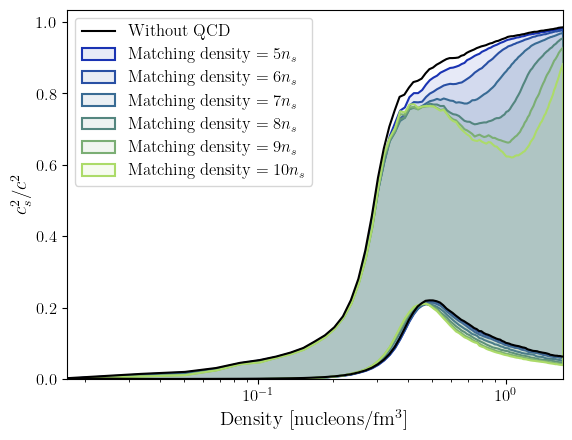

In [2]:
x = to_nucleons_per_cubic_femtometre(np.linspace(2.8e13, 2.8e15, 100))

fig, ax = plt.subplots()
ax.set_xscale('log')

quantiles = pd.read_csv('quantiles/cs2_of_rho_quantiles.csv')
ax.plot(x, quantiles.loc[5,:].values, c='k', label='Without QCD')
ax.plot(x, quantiles.loc[95,:].values, c='k')

ns_list = [5,6,7,8,9,10]

for i, ns in enumerate(ns_list):

    quantiles = pd.read_csv(f'quantiles/cs2_of_rho_quantiles_{ns:02}nsat_Xmarg.csv')

    ax.fill_between(
        x, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=list(cm.imola(i/(len(ns_list))))[:3]+[0.1], 
        edgecolor=cm.imola(i/(len(ns_list))),
        linewidth=1.5,
        label=f'Matching density $={ns}n_s$'
        )
    
    # ax.fill_between(
    #     x, 
    #     quantiles.loc[5,:].values, 
    #     quantiles.loc[95,:].values, 
    #     color=list(cm.imola(i/(len(ns_list))))[:3]+[0.0], 
    #     edgecolor=cm.imola(i/(len(ns_list))),
    #     linewidth=1.5,
    #     zorder=2
    #     )

# ax.axvline(0.15, c='k')

ax.legend(loc='upper left')

ax.set_ylim(0)
ax.set_xlim(x[0], x[-1])

ax.set_xlabel('Density [nucleons/fm$^3$]')
ax.set_ylabel('$c_s^2/c^2$')

fig.savefig(
    'figures/speed_of_sound_vs_density/speed_of_sound_vs_density_Xmarg.pdf', 
    bbox_inches='tight'
    )

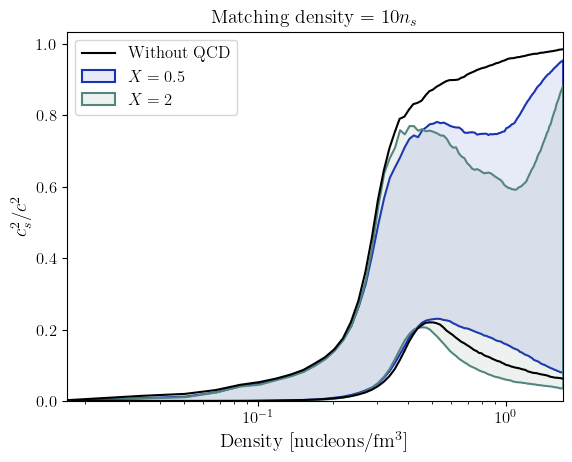

In [3]:
x = to_nucleons_per_cubic_femtometre(np.linspace(2.8e13, 2.8e15, 100))

fig, ax = plt.subplots()
ax.set_xscale('log')

quantiles = pd.read_csv('quantiles/cs2_of_rho_quantiles.csv')
ax.plot(x, quantiles.loc[5,:].values, c='k', label='Without QCD')
ax.plot(x, quantiles.loc[95,:].values, c='k')

ns = 10
X_list = [0.5, 2]

for i, X in enumerate(X_list):

    quantiles = pd.read_csv(f'quantiles.old/cs2_of_rho_quantiles_ns{ns:02}_X{X}.csv')

    ax.fill_between(
        x, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=list(cm.imola(i/(len(X_list))))[:3]+[0.1], 
        edgecolor=cm.imola(i/(len(X_list))),
        linewidth=1.5,
        label=f'$X={X}$'
        )

# ax.axvline(0.15, c='k')

ax.legend(loc='upper left')

ax.set_ylim(0)
ax.set_xlim(x[0], x[-1])

ax.set_title(f'Matching density $={ns:02}n_s$')
ax.set_xlabel('Density [nucleons/fm$^3$]')
ax.set_ylabel('$c_s^2/c^2$')

fig.savefig(
    f'figures/speed_of_sound_vs_density/speed_of_sound_vs_density_ns{ns:02}_Xcomparison.pdf', 
    bbox_inches='tight'
    )

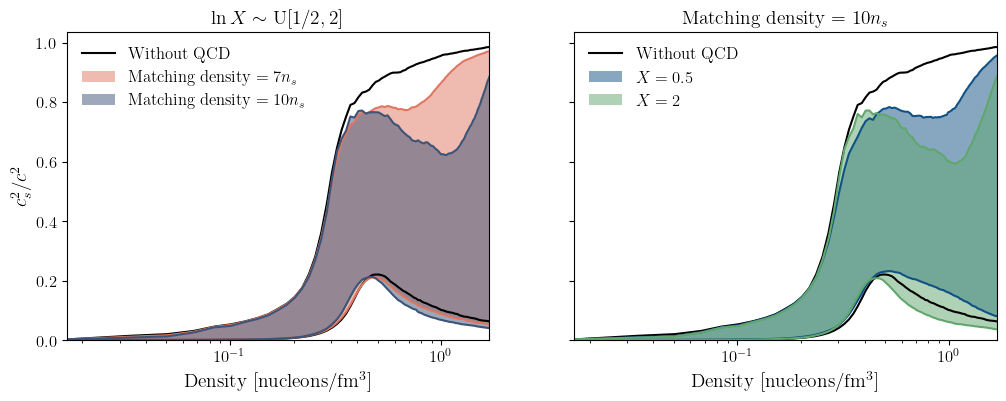

In [4]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 4))
axs[0].set_xscale('log')

x = to_nucleons_per_cubic_femtometre(np.linspace(2.8e13, 2.8e15, 100))

quantiles = pd.read_csv('quantiles/cs2_of_rho_quantiles.csv')

for ax in axs:
    ax.plot(x, quantiles.loc[5,:].values, color='k', label='Without QCD')
    ax.plot(x, quantiles.loc[95,:].values, color='k')

axs[0].set_title('$\ln{X} \sim \mathrm{U}[1/2,2]$')

ns_list = [7,10]
c_list = [cm.lipari(0.65), cm.lipari(0.2)]

for i, ns in enumerate(ns_list):

    quantiles = pd.read_csv(f'quantiles/cs2_of_rho_quantiles_{ns:02}nsat_Xmarg.csv')

    axs[0].fill_between(
        x, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=c_list[i], 
        alpha=0.5,
        linewidth=0,
        label=f'Matching density $={ns}n_s$'
        )
    
    axs[0].plot(
        x, 
        quantiles.loc[5,:].values,
        color=c_list[i],
        zorder=2
        )
    
    axs[0].plot(
        x, 
        quantiles.loc[95,:].values,
        color=c_list[i],
        zorder=2
        )


ns = 10
axs[1].set_title(f'Matching density $={ns:02}n_s$')

X_list = [0.5, 2]
c_list = [cm.navia(0.2), cm.navia(0.65)]

for i, X in enumerate(X_list):

    quantiles = pd.read_csv(f'quantiles.old/cs2_of_rho_quantiles_ns{ns:02}_X{X}.csv')

    axs[1].fill_between(
        x, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=c_list[i], 
        alpha=0.5,
        linewidth=0,
        label=f'$X={X}$'
        )
    
    axs[1].plot(
        x, 
        quantiles.loc[5,:].values,
        color=c_list[i],
        zorder=2
        )
    
    axs[1].plot(
        x, 
        quantiles.loc[95,:].values,
        color=c_list[i],
        zorder=2
        )

axs[0].legend(loc='upper left', frameon=False)
axs[1].legend(loc='upper left', frameon=False)

axs[0].set_xlim(x[0], x[-1])
axs[0].set_ylim(0)

axs[0].set_xlabel('Density [nucleons/fm$^3$]')
axs[1].set_xlabel('Density [nucleons/fm$^3$]')
axs[0].set_ylabel('$c_s^2/c^2$')

fig.savefig(
    'figures/speed_of_sound_vs_density/speed_of_sound_vs_density.pdf', 
    bbox_inches='tight'
    )


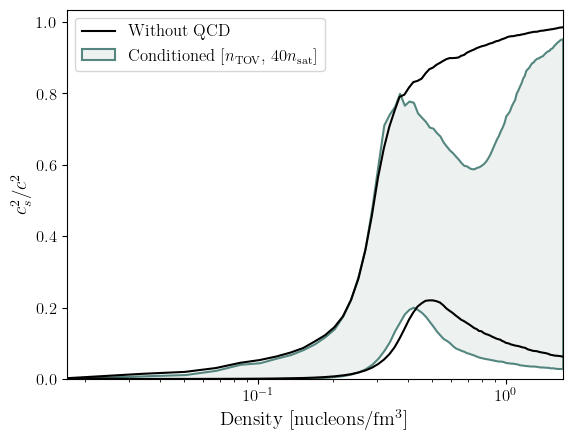

In [5]:
x = to_nucleons_per_cubic_femtometre(np.linspace(2.8e13, 2.8e15, 100))

fig, ax = plt.subplots()
ax.set_xscale('log')

quantiles = pd.read_csv('quantiles/cs2_of_rho_quantiles.csv')
ax.plot(x, quantiles.loc[5,:].values, c='k', label='Without QCD')
ax.plot(x, quantiles.loc[95,:].values, c='k')

quantiles = pd.read_csv(f'quantiles/cs2_of_rho_quantiles_ntov_marg.csv')

ax.fill_between(
    x, 
    quantiles.loc[5,:].values, 
    quantiles.loc[95,:].values, 
    color=list(cm.imola(1/2))[:3]+[0.1], 
    edgecolor=cm.imola(1/2),
    linewidth=1.5,
    label='Conditioned [$n_\mathrm{TOV}$, $40n_\mathrm{sat}$]',
    )

# ax.axvline(0.15, c='k')

ax.legend(loc='upper left')

ax.set_ylim(0)
ax.set_xlim(x[0], x[-1])

ax.set_xlabel('Density [nucleons/fm$^3$]')
ax.set_ylabel('$c_s^2/c^2$')

fig.savefig(
    f'figures/speed_of_sound_vs_density/speed_of_sound_vs_density_marg.pdf', 
    bbox_inches='tight'
    )

### Plot some individual EOSs

In [6]:
collated_eos = pd.read_csv('collated_eos.csv')
collated_ntov = to_nucleons_per_cubic_femtometre(collated_eos['rhoc(M@Mmax)'])

astro_weights = np.exp(collated_eos.logweight_total.values)

In [7]:
from qcd_likelihood import eos_marginalization

eos_marg_cond = eos_marginalization()
pQCD_likelihood = eos_marg_cond.marg_QCD_likelihood()

In [8]:
# Get a selection of likely and unlikely EOSs
likely = []
unlikely = []
threshold = 0.1

N_samp = 1000
for eos, ntov in zip(collated_eos.eos[:N_samp], collated_ntov[:N_samp]):

    eos = int(eos)
    df = pd.read_csv(f'eos-draws/eos-draw-{eos:06}.csv')

    pressure = to_GeV_per_cubic_femtometre(df.pressurec2)
    energy_density = to_GeV_per_cubic_femtometre(df.energy_densityc2)
    number_density = to_nucleons_per_cubic_femtometre(df.baryon_density)

    ntov_index = np.argmin(np.abs(number_density - ntov))

    if ntov < 35*nsat:

        likelihood = pQCD_likelihood(
            energy_density[ntov_index], 
            pressure[ntov_index], 
            ntov
            )
        
        if likelihood > threshold:
            likely.append([pressure, energy_density, number_density])
        else:
            unlikely.append([pressure, energy_density, number_density])

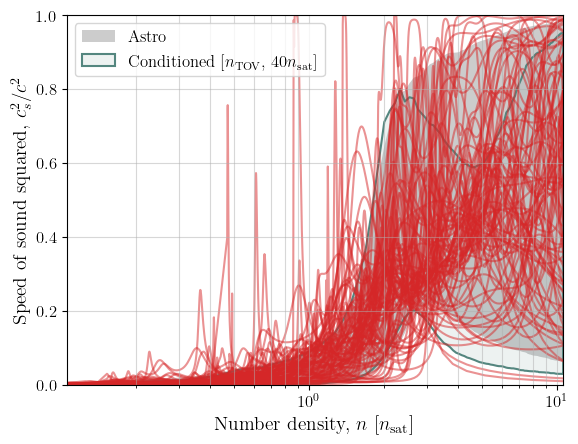

In [10]:
x = to_nucleons_per_cubic_femtometre(np.linspace(2.8e13, 2.8e15, 100))/nsat

fig, ax = plt.subplots()
ax.set_xscale('log')

quantiles = pd.read_csv('quantiles/cs2_of_rho_quantiles.csv')
ax.fill_between(
    x, 
    quantiles.loc[5,:].values, 
    quantiles.loc[95,:].values, 
    color='#CCCCCC', 
    linewidth=0,
    label='Astro',
    )

quantiles = pd.read_csv(f'quantiles/cs2_of_rho_quantiles_ntov_marg.csv')
ax.fill_between(
    x, 
    quantiles.loc[5,:].values, 
    quantiles.loc[95,:].values, 
    color=list(cm.imola(1/2))[:3]+[0.1], 
    edgecolor=cm.imola(1/2),
    linewidth=1.5,
    label='Conditioned [$n_\mathrm{TOV}$, $40n_\mathrm{sat}$]',
    )

N_samp = 95
for pressure, energy_density, number_density in unlikely[:N_samp]:

    speed_of_sound_squared = np.gradient(pressure, energy_density)

    ax.plot(
        number_density/nsat, 
        speed_of_sound_squared, 
        color='C3', 
        alpha=0.5,
        zorder=1
        )

ax.grid(True, which='both', alpha=0.5)

ax.legend(loc='upper left')

ax.set_ylim(0,1)
ax.set_xlim(x[0], x[-1])

ax.set_xlabel('Number density, $n$ [$n_\mathrm{sat}$]')
_ = ax.set_ylabel('Speed of sound squared, $c_s^2/c^2$')

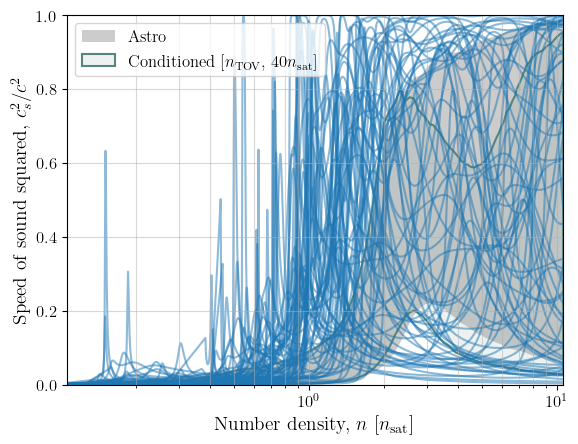

In [12]:
x = to_nucleons_per_cubic_femtometre(np.linspace(2.8e13, 2.8e15, 100))/nsat

fig, ax = plt.subplots()
ax.set_xscale('log')

quantiles = pd.read_csv('quantiles/cs2_of_rho_quantiles.csv')
ax.fill_between(
    x, 
    quantiles.loc[5,:].values, 
    quantiles.loc[95,:].values, 
    color='#CCCCCC', 
    linewidth=0,
    label='Astro',
    )

quantiles = pd.read_csv(f'quantiles/cs2_of_rho_quantiles_ntov_marg.csv')
ax.fill_between(
    x, 
    quantiles.loc[5,:].values, 
    quantiles.loc[95,:].values, 
    color=list(cm.imola(1/2))[:3]+[0.1], 
    edgecolor=cm.imola(1/2),
    linewidth=1.5,
    label='Conditioned [$n_\mathrm{TOV}$, $40n_\mathrm{sat}$]',
    )

N_samp = 70
for pressure, energy_density, number_density in likely[:N_samp]:

    speed_of_sound_squared = np.gradient(pressure, energy_density)

    ax.plot(
        number_density/nsat, 
        speed_of_sound_squared, 
        color='C0', 
        alpha=0.5,
        zorder=1
        )

ax.grid(True, which='both', alpha=0.5)

ax.legend(loc='upper left')

ax.set_ylim(0,1)
ax.set_xlim(x[0], x[-1])

ax.set_xlabel('Number density, $n$ [$n_\mathrm{sat}$]')
_ = ax.set_ylabel('Speed of sound squared, $c_s^2/c^2$')